In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers

from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")



In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CLc0aLxPSzCoSN4JEF8U6ObY2lvMF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--de9f4606-e5a1-4d2c-a1e4-1232afa5ded6-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_groq import ChatGroq

groq_llm=ChatGroq(model="qwen/qwen3-32b")

groq_llm.invoke("Hi qwen how r u")

AIMessage(content='<think>\nOkay, the user sent "Hi qwen how r u", which is a casual greeting. First, I need to respond in a friendly and approachable manner. Since it\'s a simple question, I should keep the reply light and not too formal.\n\nThe user might be starting a conversation or testing if I\'m online. My response should encourage further interaction. Maybe ask how they\'re doing in return. Also, offer assistance in case they have questions or need help. Make sure to keep the tone cheerful and welcoming. Let me put that together in a natural way without any markdown. Just a simple, warm reply.\n</think>\n\nHi there! 😊 I\'m doing great, thanks for asking! How are you feeling today? If you have any questions or need help with anything, feel free to let me know - I\'m here to chat and assist! 🌟', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 178, 'prompt_tokens': 14, 'total_tokens': 192, 'completion_time': 0.399318889, 'prompt_time': 0.000336796, 'q

In [25]:
## creating nodes
def chatbot(state:State):
    return {"messages":[groq_llm.invoke(state["messages"])]}


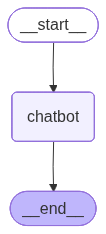

In [26]:
graph=StateGraph(State)

## Adding nodes
graph.add_node("chatbot",chatbot)

## adding edges
graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

graph_builder=graph.compile()

## Display
from IPython.display import display, Image
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [27]:
graph_builder.invoke({'messages':" Hello, who are you?"}) 



{'messages': [HumanMessage(content=' Hello, who are you?', additional_kwargs={}, response_metadata={}, id='7f6423bd-10ab-4d87-8b43-3e888ca28504'),
  AIMessage(content="<think>\nOkay, the user is asking me who I am. Let me start by introducing my name, Qwen. Then I should mention my capabilities, like answering questions, creating text such as stories, official documents, emails, scripts, and more. I can also express opinions, play games, and support multiple languages. It's important to highlight that I'm developed by Alibaba Cloud's Tongyi Lab.\n\nI need to keep the response friendly and conversational, avoiding any markdown formatting. Also, since the user might be new, I should keep it simple and not overload with information. Maybe end with an invitation for them to ask anything they need help with. Let me check the guidelines to ensure I'm not missing anything. Alright, that should cover it.\n</think>\n\nHello! I'm Qwen, a large language model developed by Alibaba Cloud's Tongyi L

In [29]:
## Streaming the responses

for event in graph_builder.stream({'messages':"hello hi how r u?"}):
    print(event)



{'chatbot': {'messages': [AIMessage(content='<think>\nOkay, the user wrote "hello hi how r u?" which is pretty casual and friendly. They might be greeting me and checking in on my status. I should respond in a warm and welcoming way. Let me make sure to acknowledge their greeting and offer assistance. I need to keep it simple and conversational. Maybe add an emoji to keep it friendly. Also, since they used "how r u?" which is a bit informal, I should mirror that informality but stay polite. Alright, something like "Hi there! I\'m doing well, thanks for asking. How can I help you today? 😊" That should work.\n</think>\n\nHi there! I\'m doing well, thanks for asking. How can I help you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 155, 'prompt_tokens': 14, 'total_tokens': 169, 'completion_time': 0.292839761, 'prompt_time': 0.000593671, 'queue_time': 0.217872398, 'total_time': 0.293433432}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp